# Evaluation

## Objectif

L'objectif de ce TP est de parvenir à détecter si une requête est une tentative d'intrusion ou bien une requête légitime.

Votre modèle devrait obtenir un score de 95%.


## Dépendances et modules

Les modules disponibles pour l'exécution de ce notebook sont :
* pandas
* scikit-learn
* matplotlib

## Source de données

Les sources de données sont des fichiers au format CSV. Vous pouvez les télécharger depuis le dossier trde703-datasets.

L'archive [public_network_log.zip](https://drive.google.com/file/d/1Zv3njVIohwX6jK4OlHfsVJjuCGCahbKa/view?usp=sharing) contient un unique fichier public_network_log.csv qui représente un log de requêtes identifiées comme une tentative d'intrusion ou une requête légitime.

L'archive dbip-country-lite-2026-01.zip contient un unique fichier [dbip-country-lite-2026-01.csv](https://drive.google.com/file/d/1AQjfEdc1uGn40jgOXl-7qe7xmnQKalaI/view?usp=sharing) qui associe à chaque plage d'IP un code Pays. Cette base de données est issue du portail [dbip](https://db-ip.com/db/format/ip-to-country/csv.html).


Charger les données


In [1]:
import pandas as pd

In [2]:
intrusion_df = pd.read_csv('./data/public_network_logs.csv')

Afficher les effectifs de la colonne `Intrusion`.


In [3]:
intrusion_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7076 entries, 0 to 7075
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Source_IP       7076 non-null   str  
 1   Destination_IP  7076 non-null   str  
 2   Port            7076 non-null   int64
 3   Request_Type    7076 non-null   str  
 4   Protocol        7076 non-null   str  
 5   Payload_Size    7076 non-null   int64
 6   User_Agent      7076 non-null   str  
 7   Status          7076 non-null   str  
 8   Intrusion       7076 non-null   int64
 9   Scan_Type       7076 non-null   str  
dtypes: int64(3), str(7)
memory usage: 552.9 KB


In [4]:
intrusion_df['Intrusion'].value_counts()

Intrusion
0    6400
1     676
Name: count, dtype: int64

In [5]:
intrusion_df['Scan_Type'].value_counts()

Scan_Type
Normal       6400
BotAttack     391
PortScan      285
Name: count, dtype: int64

In [6]:
pd.crosstab(intrusion_df['Intrusion'], intrusion_df['Scan_Type'])

Scan_Type,BotAttack,Normal,PortScan
Intrusion,,,
0,0,6400,0
1,391,0,285


Afficher les 2 représentations les plus adaptées à la colonne `Payload_Size`.


In [7]:
intrusion_df['Payload_Size'].describe()

count    7076.000000
mean     1599.082956
std       915.634231
min         0.000000
25%       842.000000
50%      1580.000000
75%      2316.750000
max      4997.000000
Name: Payload_Size, dtype: float64

<Axes: >

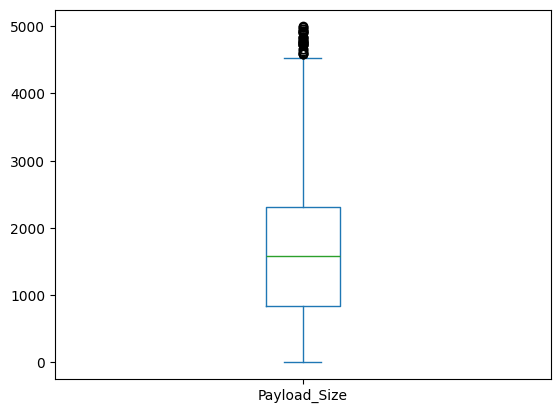

In [9]:
intrusion_df['Payload_Size'].plot(kind='box')

<Axes: ylabel='Frequency'>

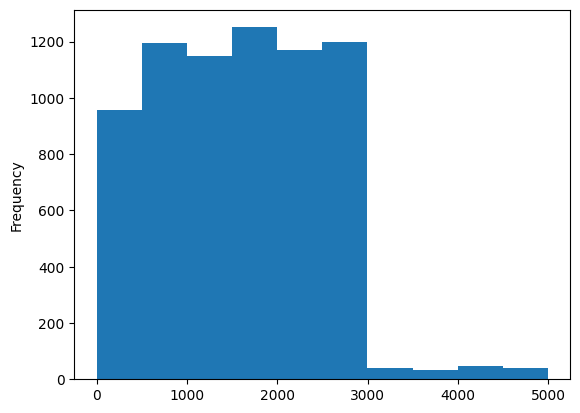

In [12]:
intrusion_df['Payload_Size'].plot(kind='hist')

Afficher la représentation la plus adaptée à `Port`.


In [13]:
intrusion_df['Port'].unique()

array([   23,  4444, 31337,   135,  6667,  8080,    53,   443,    80,
          22,    21,    25])

In [30]:
intrusion_df['Port'].value_counts().info()

<class 'pandas.Series'>
Index: 12 entries, 22 to 135
Series name: count
Non-Null Count  Dtype
--------------  -----
12 non-null     int64
dtypes: int64(1)
memory usage: 192.0 bytes


<Axes: xlabel='Port'>

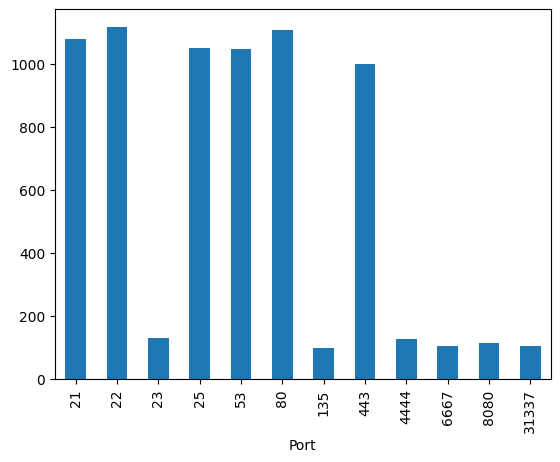

In [27]:
intrusion_df['Port'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='Port'>

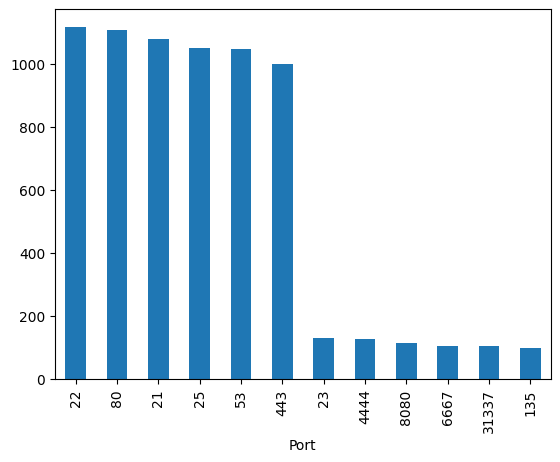

In [31]:
intrusion_df['Port'].value_counts().plot(kind='bar')

Afficher sur un même graphique les variables `Payload_Size`, `Port` et `Intrusion`.


Sélectionner les colonnes pour lesquelles un encodage est nécessaire.


Sélectionner les colonnes pour lesquelles une standardisation est nécessaire.


Sélectionner un modèle et l'entrainer.

Evaluer les performances de votre modèle.

Choisir un affichage permettant de restituer les performances du modèle sélectionné.